In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("./E Commerce Dataset.csv")

In [3]:
dumm = pd.get_dummies(df)
dummies = dumm[['Churn', 'DaySinceLastOrder']]
day_dumm = dummies.dropna(axis=0)
day_idx = day_dumm['DaySinceLastOrder']<2

day_dumm['Churn'].corr(day_idx)

0.20482008729570475

In [4]:
df.dtypes

CustomerID                       int64
Churn                            int64
Tenure                         float64
PreferredLoginDevice            object
CityTier                         int64
WarehouseToHome                float64
PreferredPaymentMode            object
Gender                          object
HourSpendOnApp                 float64
NumberOfDeviceRegistered         int64
PreferedOrderCat                object
SatisfactionScore                int64
MaritalStatus                   object
NumberOfAddress                  int64
Complain                         int64
OrderAmountHikeFromlastYear    float64
CouponUsed                     float64
OrderCount                     float64
DaySinceLastOrder              float64
CashbackAmount                   int64
dtype: object

In [5]:
df['PreferredPaymentMode'] = df['PreferredPaymentMode'].replace('Credit Card','CC')

In [6]:
df['PreferredPaymentMode']

0       Debit Card
1              UPI
2       Debit Card
3       Debit Card
4               CC
           ...    
5625            CC
5626            CC
5627    Debit Card
5628            CC
5629            CC
Name: PreferredPaymentMode, Length: 5630, dtype: object

In [7]:
df['PreferredPaymentMode'].replace('Cash on Delivery','COD', inplace=True)
df['PreferredPaymentMode'].replace('Mobile Phone','Phone', inplace=True)
df['PreferredPaymentMode'].replace('Credit Card','CC')

0       Debit Card
1              UPI
2       Debit Card
3       Debit Card
4               CC
           ...    
5625            CC
5626            CC
5627    Debit Card
5628            CC
5629            CC
Name: PreferredPaymentMode, Length: 5630, dtype: object

In [8]:
df['PreferredPaymentMode'].unique()

array(['Debit Card', 'UPI', 'CC', 'COD', 'E wallet'], dtype=object)

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

In [10]:
def train_and_test (X, y, classifier, test_size): 
    # categorical, numerical columns 분리
    cat_columns = X.select_dtypes(include="O").columns
    num_columns = []
    for col in X.columns:
        if col not in cat_columns:
            num_columns.append(col)
    
    # categorical columns 원핫인코딩
    categorical_col = Pipeline(steps=[
          ('encoding', OneHotEncoder())
      ])
    
    # 결측치 mean filling
    numerical_col = Pipeline(steps=[
          ('imputer', SimpleImputer(strategy="mean")),
          ('scaler', StandardScaler())
      ])
    
    # columns 변환
    transformer = ColumnTransformer(transformers=[
        ('categorical_col', categorical_col, cat_columns),    
        ('numerical_col', numerical_col, num_columns)
              ])
    
    # create model
    model = Pipeline([
          ('transformer', transformer),
          ('classifier', classifier)
      ])

    # data train, test 스플릿
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)

    model.fit(X_train, y_train)
    
    # calculate the training data accuracy and confusion matix
    pred = model.predict(X_train)
    accuracy = accuracy_score(y_train, pred)
    matrix = confusion_matrix(y_train, pred)
    
    print('Train accuracy: ', accuracy * 100, '%')

    # calculate the testing data accuracy and confusion matix
    pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, pred)
    confmat = confusion_matrix(y_test, pred)

    print('Test accuracy: ', accuracy * 100, '%')
    print("=====================================================================")
    
    fig, ax = plt.subplots(figsize=(2.5, 2.5))
    ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
    for i in range(confmat.shape[0]):
        for j in range(confmat.shape[1]):
            ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')

    plt.xlabel('Predicted label')
    plt.ylabel('True label')

    plt.tight_layout()
    # plt.savefig('images/06_09.png', dpi=300)
    plt.show()
    
    

    # 1. 필요한 함수를 임포트합니다.
    # 이미 matplotlib.pyplot은 임포트되어 있으므로 roc_curve와 auc만 추가로 임포트합니다.

    # 테스트 데이터에 대한 클래스 확률을 예측합니다.
    # 이 예제에서는 이진 분류를 가정합니다. 다중 클래스 분류의 경우 로직이 달라질 수 있습니다.
    y_prob = model.predict_proba(X_test)[:, 1]

    # 2. roc_curve 함수를 사용하여 TPR과 FPR을 계산합니다.
    fpr, tpr, thresholds = roc_curve(y_test, y_prob)

    # 3. auc 함수를 사용하여 AUC 값을 계산합니다.
    roc_auc = auc(fpr, tpr)

    # 4. ROC 곡선을 그립니다.
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()
    
    return model

In [11]:
X = df.drop(columns=['Churn'])
y = df["Churn"]

test_size=0.2

Train accuracy:  88.94316163410302 %
Test accuracy:  91.47424511545293 %


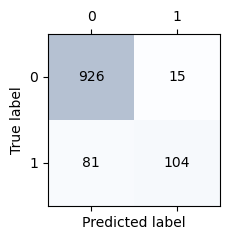

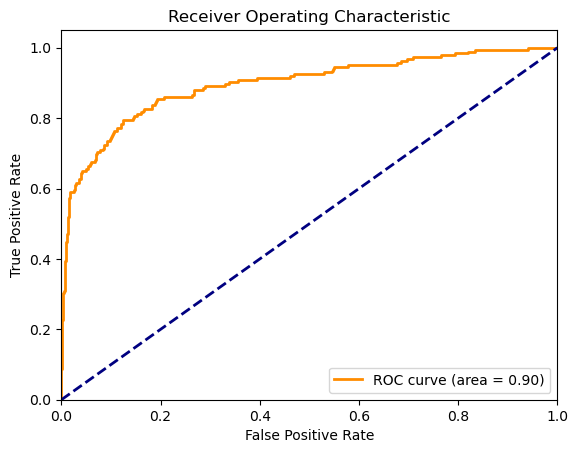

In [12]:
# 로지스틱회귀를 이용한 모델학습

model = train_and_test(X, y, LogisticRegression(solver='liblinear'), test_size)



Train accuracy:  100.0 %
Test accuracy:  95.82593250444049 %


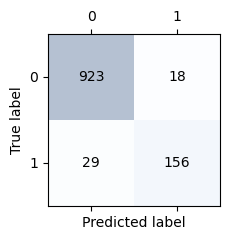

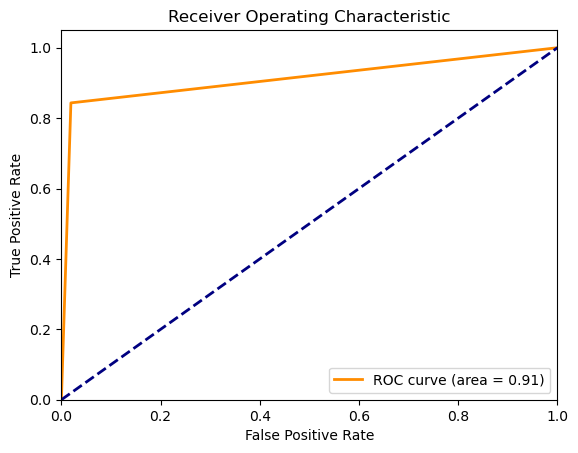

In [13]:
from sklearn.tree import DecisionTreeClassifier
model = train_and_test(X, y, DecisionTreeClassifier(random_state=42), test_size)


Train accuracy:  100.0 %
Test accuracy:  96.0923623445826 %


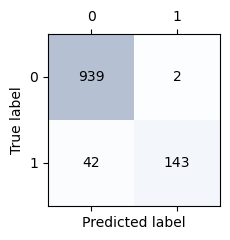

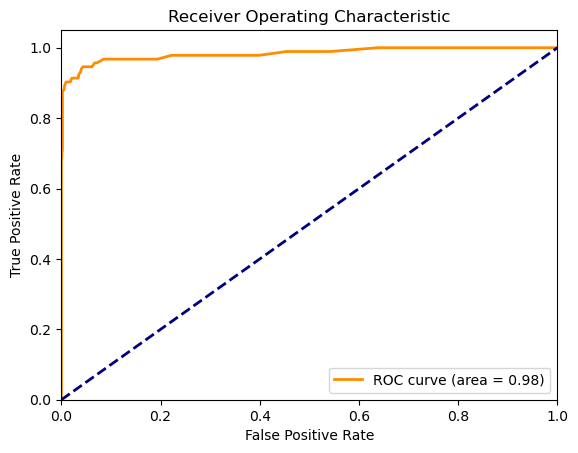

In [14]:
from sklearn.ensemble import RandomForestClassifier
model = train_and_test(X, y, RandomForestClassifier(random_state=42), test_size)

Train accuracy:  100.0 %
Test accuracy:  97.60213143872114 %


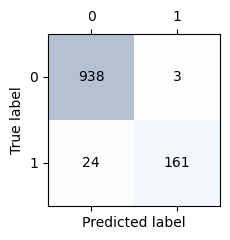

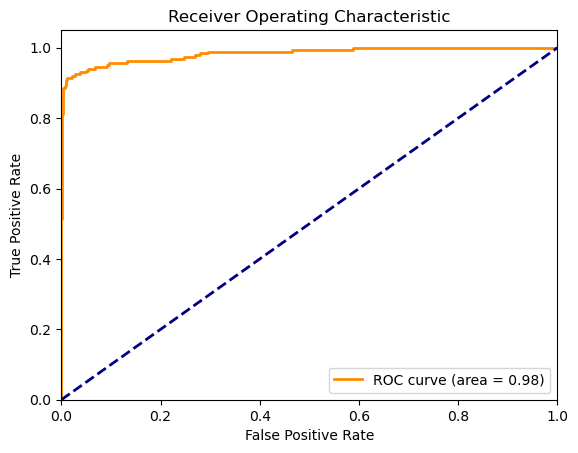

In [15]:
import xgboost as xgb
model = train_and_test(X, y, xgb.XGBClassifier(random_state=42), test_size)


In [16]:
import pickle

with open('model.pkl', 'wb') as file:
    pickle.dump(model, file)


In [17]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

In [28]:
def xgb_best_train_and_test (X, y, classifier, test_size): 
    # categorical, numerical columns 분리
    cat_columns = X.select_dtypes(include="O").columns
    num_columns = []
    for col in X.columns:
        if col not in cat_columns:
            num_columns.append(col)
    
    # categorical columns 원핫인코딩
    categorical_col = Pipeline(steps=[
          ('encoding', OneHotEncoder())
      ])
    
    # 결측치 mean filling
    numerical_col = Pipeline(steps=[
          ('imputer', SimpleImputer(strategy="mean")),
          ('scaler', StandardScaler())
      ])
    
    # columns 변환
    transformer = ColumnTransformer(transformers=[
        ('categorical_col', categorical_col, cat_columns),    
        ('numerical_col', numerical_col, num_columns)
              ])
    
    # create model
    model = Pipeline([
          ('transformer', transformer),
          ('classifier', classifier)
      ])

    # data train, test 스플릿
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)

 
    # XGBoost 분류기 설정
    classifier = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

    # 그리드 서치를 위한 파라미터 그리드 정의
    param_grid = {
        'classifier__n_estimators': [100, 200, 300],
        'classifier__learning_rate': [0.01, 0.05, 0.1, 0.3, 0.5],
        'classifier__max_depth': [3, 4, 5, 6, 7, 8]
    }

    # GridSearchCV 설정
    grid_search = GridSearchCV(model, param_grid, scoring='accuracy', cv=5, n_jobs=-1)

    # 그리드 서치 실행
    grid_search.fit(X_train, y_train)

    # 최적의 하이퍼파라미터 출력
    print("Best parameters:", grid_search.best_params_)
    print("Best score:", grid_search.best_score_)

    # 최적의 모델로 테스트 데이터 평가
    best_model = grid_search.best_estimator_
    pred = best_model.predict(X_test)
    confmat = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    print('Test accuracy with best model: ', accuracy * 100, '%')

    print('Test accuracy: ', accuracy * 100, '%')
    print("=====================================================================")
    
    fig, ax = plt.subplots(figsize=(2.5, 2.5))
    ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
    for i in range(confmat.shape[0]):
        for j in range(confmat.shape[1]):
            ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')

    plt.xlabel('Predicted label')
    plt.ylabel('True label')

    plt.tight_layout()
    plt.show()
    

    # 테스트 데이터에 대한 클래스 확률을 예측
    y_prob = best_model.predict_proba(X_test)[:, 1]

    # roc_curve 함수를 사용하여 TPR과 FPR 계산
    fpr, tpr, thresholds = roc_curve(y_test, y_prob)

    # auc 함수를 사용하여 AUC 값을 계산
    roc_auc = auc(fpr, tpr)

    # ROC 곡선
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()
    return best_model

Best parameters: {'classifier__learning_rate': 0.1, 'classifier__max_depth': 7, 'classifier__n_estimators': 300}
Best score: 0.9567066222715501
Test accuracy with best model:  97.51332149200711 %
Test accuracy:  97.51332149200711 %


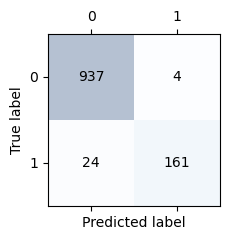

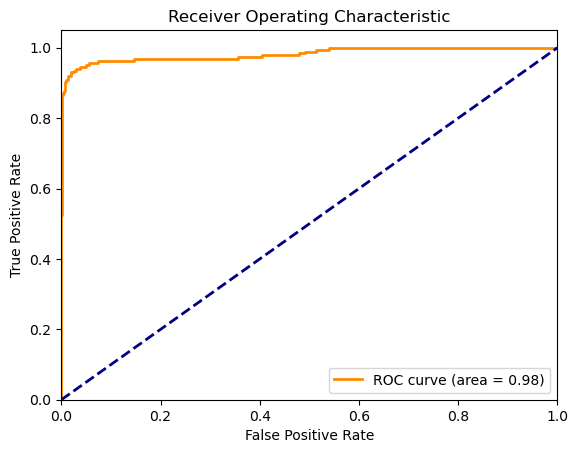

In [29]:
model = xgb_best_train_and_test(X, y, xgb.XGBClassifier(random_state=42), test_size)